# Loan Sanction Prediction

| Variable | Definition |
|----------|------------|
|Cutomer ID | Represents a unique identification number of a coustomer|
|Name | Represents the name of a customer|
|Gener | Represents the gender of a customer|
|Age | Represents the age of a customer|
|Income | Represents the income of a customer|
|Income Stability | Represents whether a customer has a stable source of income|
|Profession | Represents the profession of a customer|
|Type of Employment | Represents the type of employment of a customer|
|Location | Represents the current location that a customer resides|
|Loan Amount Request | Represents the loan amount requested by a customer|
|Current Loan Expenses | If a customer has any current active loans, then this represents the amount that a customer spends on these loan (monthly)|
|Expense Type 1 | Represents a type of expense that a customer spends on (monthly)|
|Expense Type 2 | Represents a type of expense that a customer spends on (monthly)|
|Dependents | Represents whether a customer has any dependencies ( spouse, parents, siblings, children etc)|
|Credit Score | Represents the credit score of a customer|
|No. of Defaults | Represents the number of time a customer has defaulted|
|Has Active Credit Card | Represents if a customer has any active credit cards or not|
|Property ID | Represents an identification number of a property|
|Property Type | Represents the type of property|
|Property Location | Represents the location of a property|
|Co-Applicant | Represents whether a customer has co-applicants|
|Property Price | Represents the selling price of a property|
|Loan Sanction Amount | Represents the loan sanctioned amount for a customers in USD|

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
import math
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,"1,933.05",Low,Working,Sales staff,Semi-Urban,"72,809.58",241.08,N,N,3.00,809.44,0,NaN,746,"1,933.05",4,Rural,1,"119,933.46","54,607.18"
1,C-33999,America Calderone,M,32,"4,952.91",Low,Working,NaN,Semi-Urban,"46,837.47",495.81,N,Y,1.00,780.40,0,Unpossessed,608,"4,952.91",2,Rural,1,"54,791.00","37,469.98"
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,"45,593.04",171.95,N,Y,1.00,833.15,0,Unpossessed,546,988.19,2,Urban,0,"72,440.58","36,474.43"
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,"80,057.92",298.54,N,Y,2.00,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,"121,441.51","56,040.54"
4,C-23459,Afton Venema,F,31,"2,614.77",Low,Working,High skill tech staff,Semi-Urban,"113,858.89",491.41,N,Y,NaN,745.55,1,Active,715,"2,614.77",4,Semi-Urban,1,"208,567.91","74,008.28"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [4]:
# checking null values
df.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

## Data Preprocessing 1

In [5]:
df.drop(columns=['Name', 'Customer ID', 'Property ID'], inplace=True)

### Segment Client Occupation into smaller Unique Value

In [6]:
df['Type of Employment'].value_counts()

Laborers                 5578
Sales staff              3736
Core staff               3230
Managers                 2495
Drivers                  1606
Accountants              1379
High skill tech staff    1307
Medicine staff            864
Security staff            579
Cooking staff             566
Private service staff     342
Cleaning staff            341
Low-skill Laborers        162
Secretaries               161
Waiters/barmen staff      149
Realty agents              86
IT staff                   77
HR staff                   72
Name: Type of Employment, dtype: int64

In [7]:
# Define a function to map original values to new categories
def map_employment(value):
    if pd.isna(value):
        return 'Unknown'
    elif 'Sales' in value or 'Realty' in value:
        return 'Sales/Realty'
    elif 'Tech' in value or 'IT' in value:
        return 'Tech/IT'
    elif 'Secretaries' in value or 'HR' in value:
        return 'Secretaries/HR'
    elif 'Laborers' in value or 'Low-skill Laborers' in value:
        return 'Laborers'
    elif 'Managers' in value:
        return 'Managers'
    elif 'Cooking' in value or 'Waiters/barmen' in value:
        return 'Hospitality'
    else:
        return 'Other'

# Apply the function to the 'Type_Organization' column
df['Type of Employment'] = df['Type of Employment'].apply(map_employment)

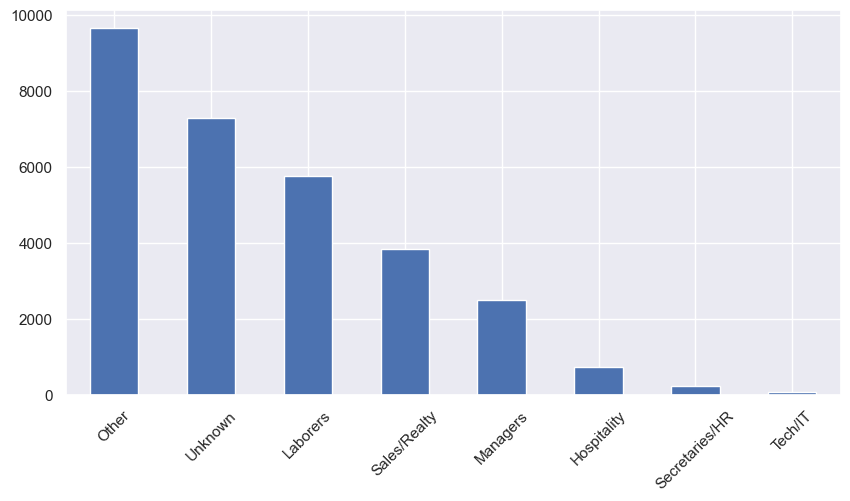

In [8]:
plt.figure(figsize=(10,5))
df['Type of Employment'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

## Exploratory Data Analysis

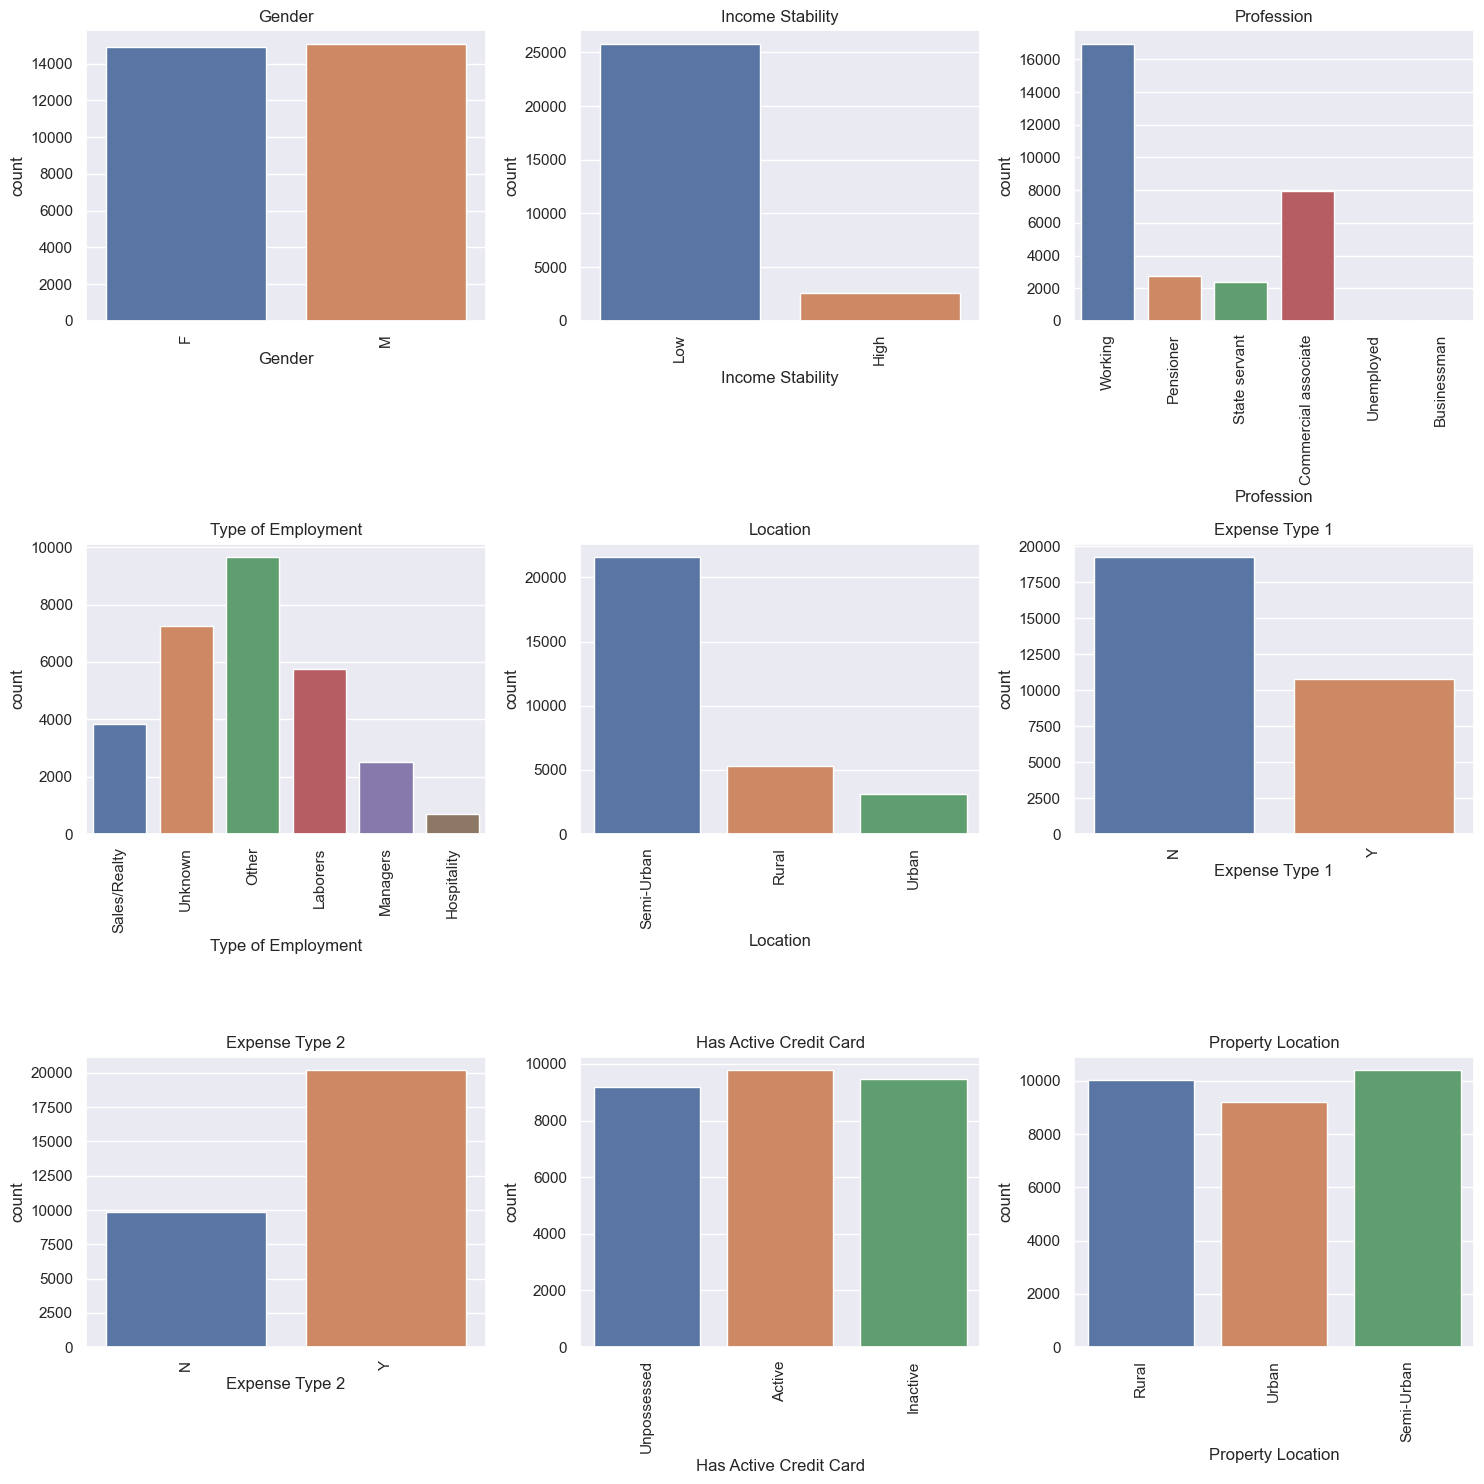

In [9]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

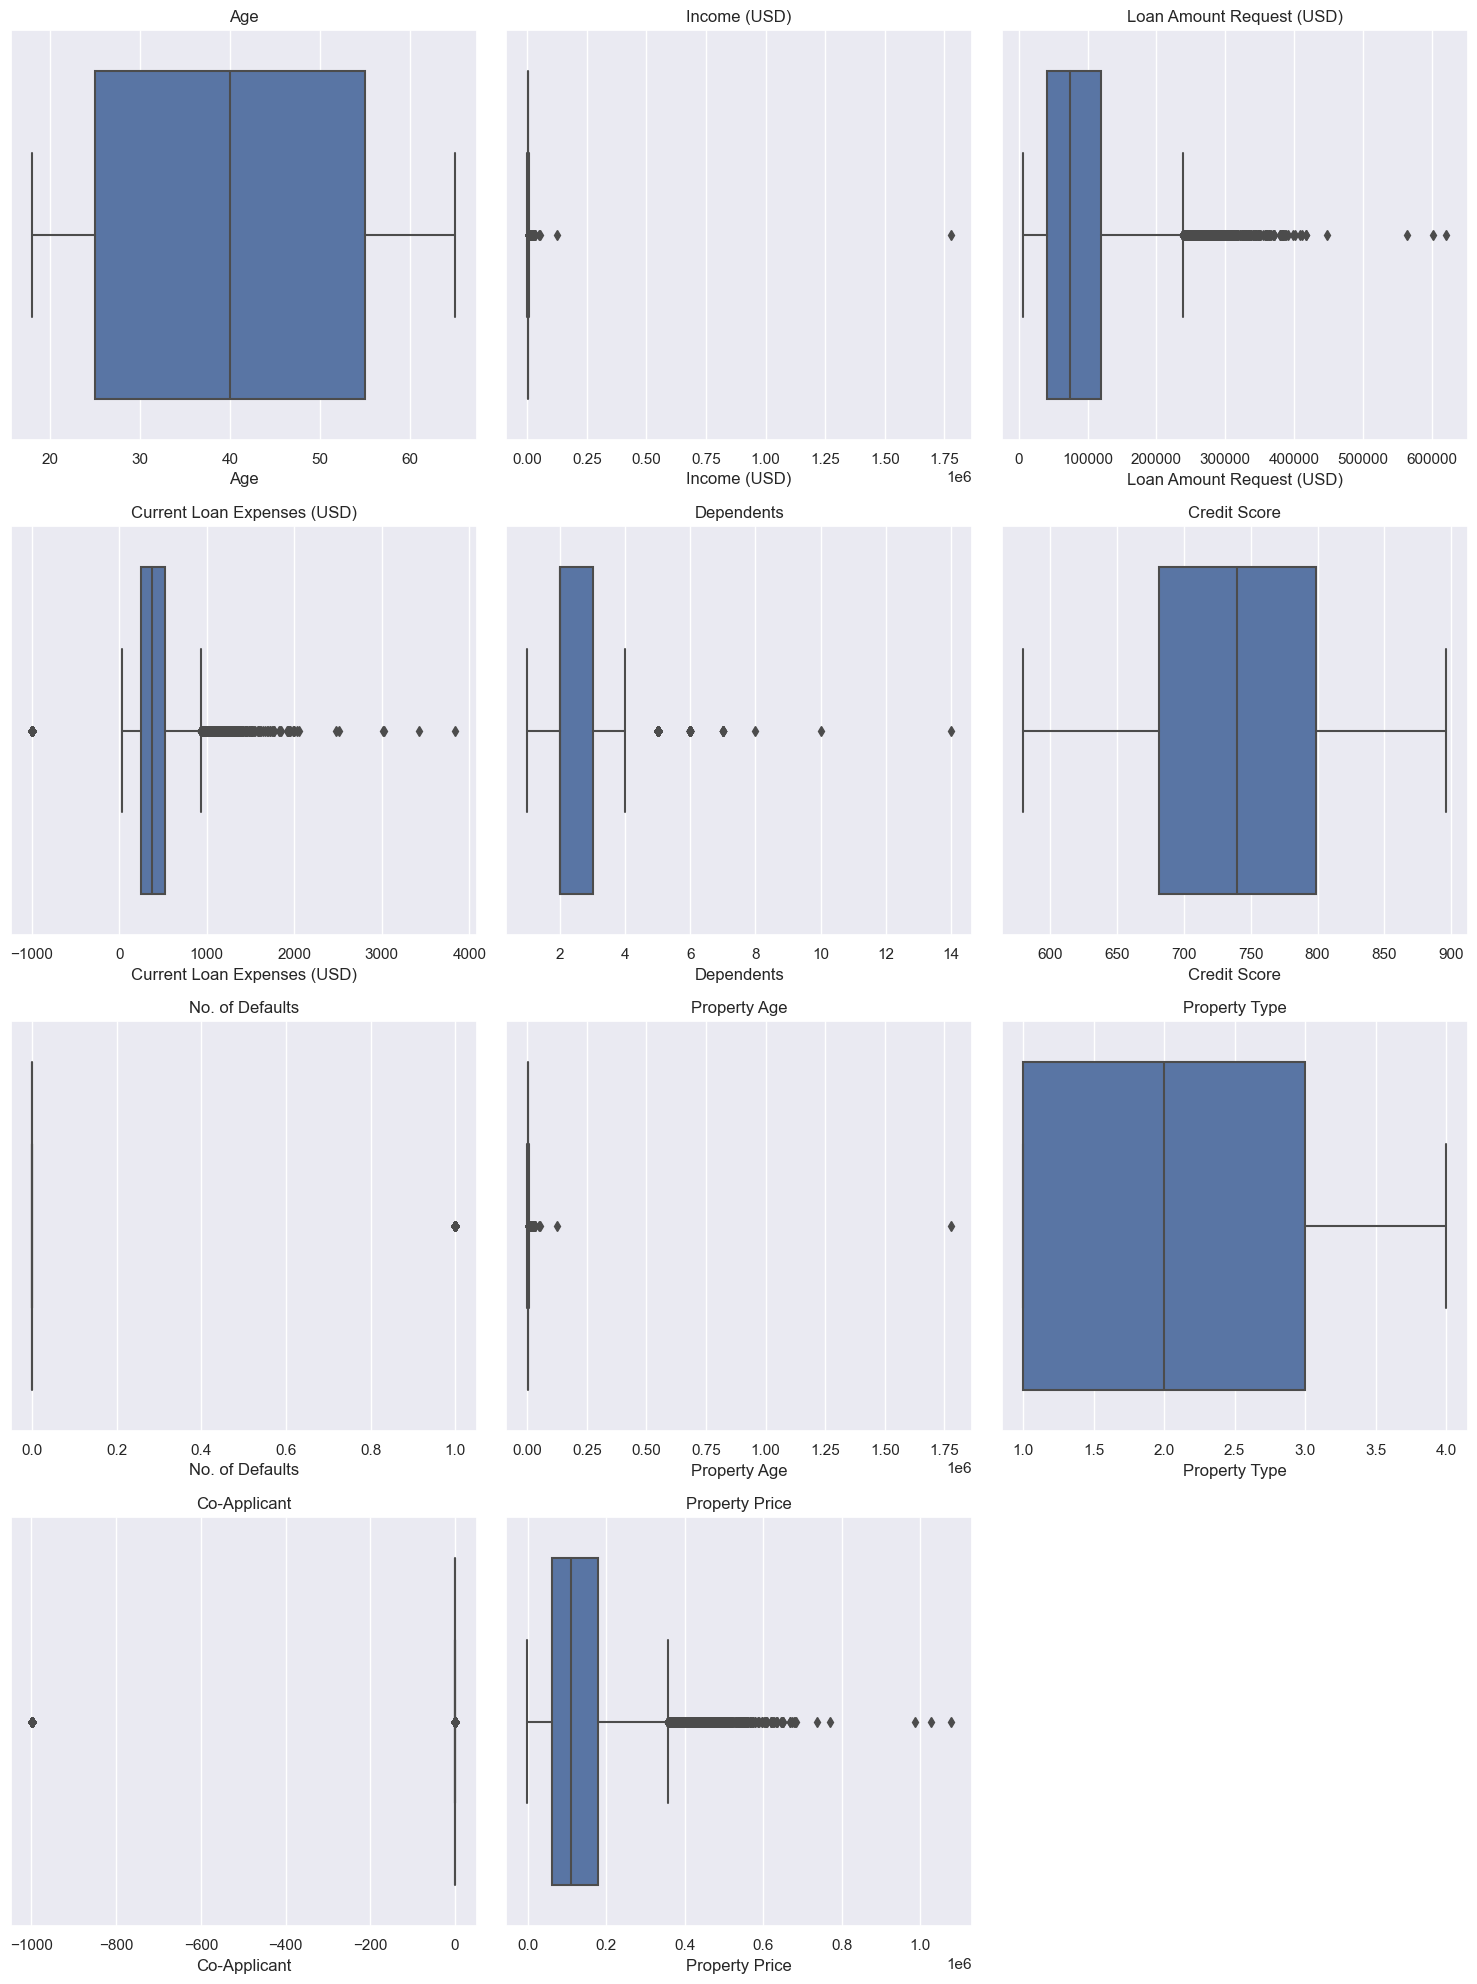

In [10]:
# Get the names of all columns with data type 'int' or 'float' except Loan Sanction Amount (USD)
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
exclude_vars = ['Loan Sanction Amount (USD)']
num_vars = [var for var in num_vars if var not in exclude_vars]

# Create a figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

## Data Preprocessing Part 2

In [11]:
# Check the amounnt of missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Property Age                  16.17
Income (USD)                  15.25
Dependents                     8.31
Credit Score                   5.68
Income Stability               5.61
Has Active Credit Card         5.22
Property Location              1.19
Loan Sanction Amount (USD)     1.13
Current Loan Expenses (USD)    0.57
Gender                         0.18
dtype: float64

In [12]:
# fill null value with median because of the outlier
df['Property Age'].fillna(df['Property Age'].median(), inplace=True)
df['Income (USD)'].fillna(df['Income (USD)'].median(), inplace=True)
df['Dependents'].fillna(df['Dependents'].median(), inplace=True)
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
df['Loan Sanction Amount (USD)'].fillna(df['Loan Sanction Amount (USD)'].median(), inplace=True)
df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].median(), inplace=True)

In [13]:
# remove null value on some column
df.dropna(subset=['Income Stability', 'Has Active Credit Card', 'Property Location', 'Gender'], inplace=True)

In [14]:
df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
1,M,32,"4,952.91",Low,Working,Unknown,Semi-Urban,"46,837.47",495.81,N,Y,1.00,780.40,0,Unpossessed,"4,952.91",2,Rural,1,"54,791.00","37,469.98"
2,F,65,988.19,High,Pensioner,Unknown,Semi-Urban,"45,593.04",171.95,N,Y,1.00,833.15,0,Unpossessed,988.19,2,Urban,0,"72,440.58","36,474.43"
3,F,65,"2,222.43",High,Pensioner,Unknown,Rural,"80,057.92",298.54,N,Y,2.00,832.70,1,Unpossessed,"2,223.25",2,Semi-Urban,1,"121,441.51","56,040.54"
4,F,31,"2,614.77",Low,Working,Other,Semi-Urban,"113,858.89",491.41,N,Y,2.00,745.55,1,Active,"2,614.77",4,Semi-Urban,1,"208,567.91","74,008.28"
5,F,60,"1,234.92",Low,State servant,Secretaries/HR,Rural,"34,434.72",181.48,N,N,2.00,684.12,1,Inactive,"1,234.92",2,Rural,1,"43,146.82","22,382.57"


## Label Encoding for Object Datatypes

In [15]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Gender: ['M' 'F']
Income Stability: ['Low' 'High']
Profession: ['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed']
Type of Employment: ['Unknown' 'Other' 'Secretaries/HR' 'Laborers' 'Managers' 'Hospitality'
 'Sales/Realty' 'Tech/IT']
Location: ['Semi-Urban' 'Rural' 'Urban']
Expense Type 1: ['N' 'Y']
Expense Type 2: ['Y' 'N']
Has Active Credit Card: ['Unpossessed' 'Active' 'Inactive']
Property Location: ['Rural' 'Urban' 'Semi-Urban']


In [16]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Gender: [1 0]
Income Stability: [1 0]
Profession: [4 1 2 0 3]
Type of Employment: [7 3 5 1 2 0 4 6]
Location: [1 0 2]
Expense Type 1: [0 1]
Expense Type 2: [1 0]
Has Active Credit Card: [2 0 1]
Property Location: [0 2 1]


## Analysis of coorelation between features

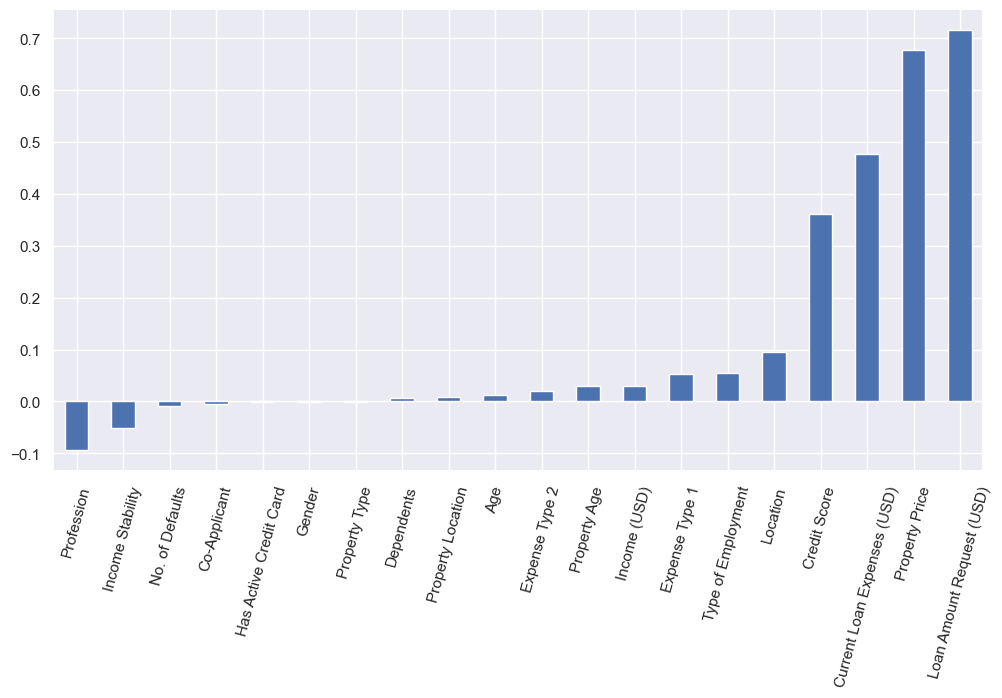

In [17]:
plt.figure(figsize=(12,6))
df.corr()['Loan Sanction Amount (USD)'][:-1].sort_values().plot(kind='bar')
plt.xticks(rotation=75)
plt.show()

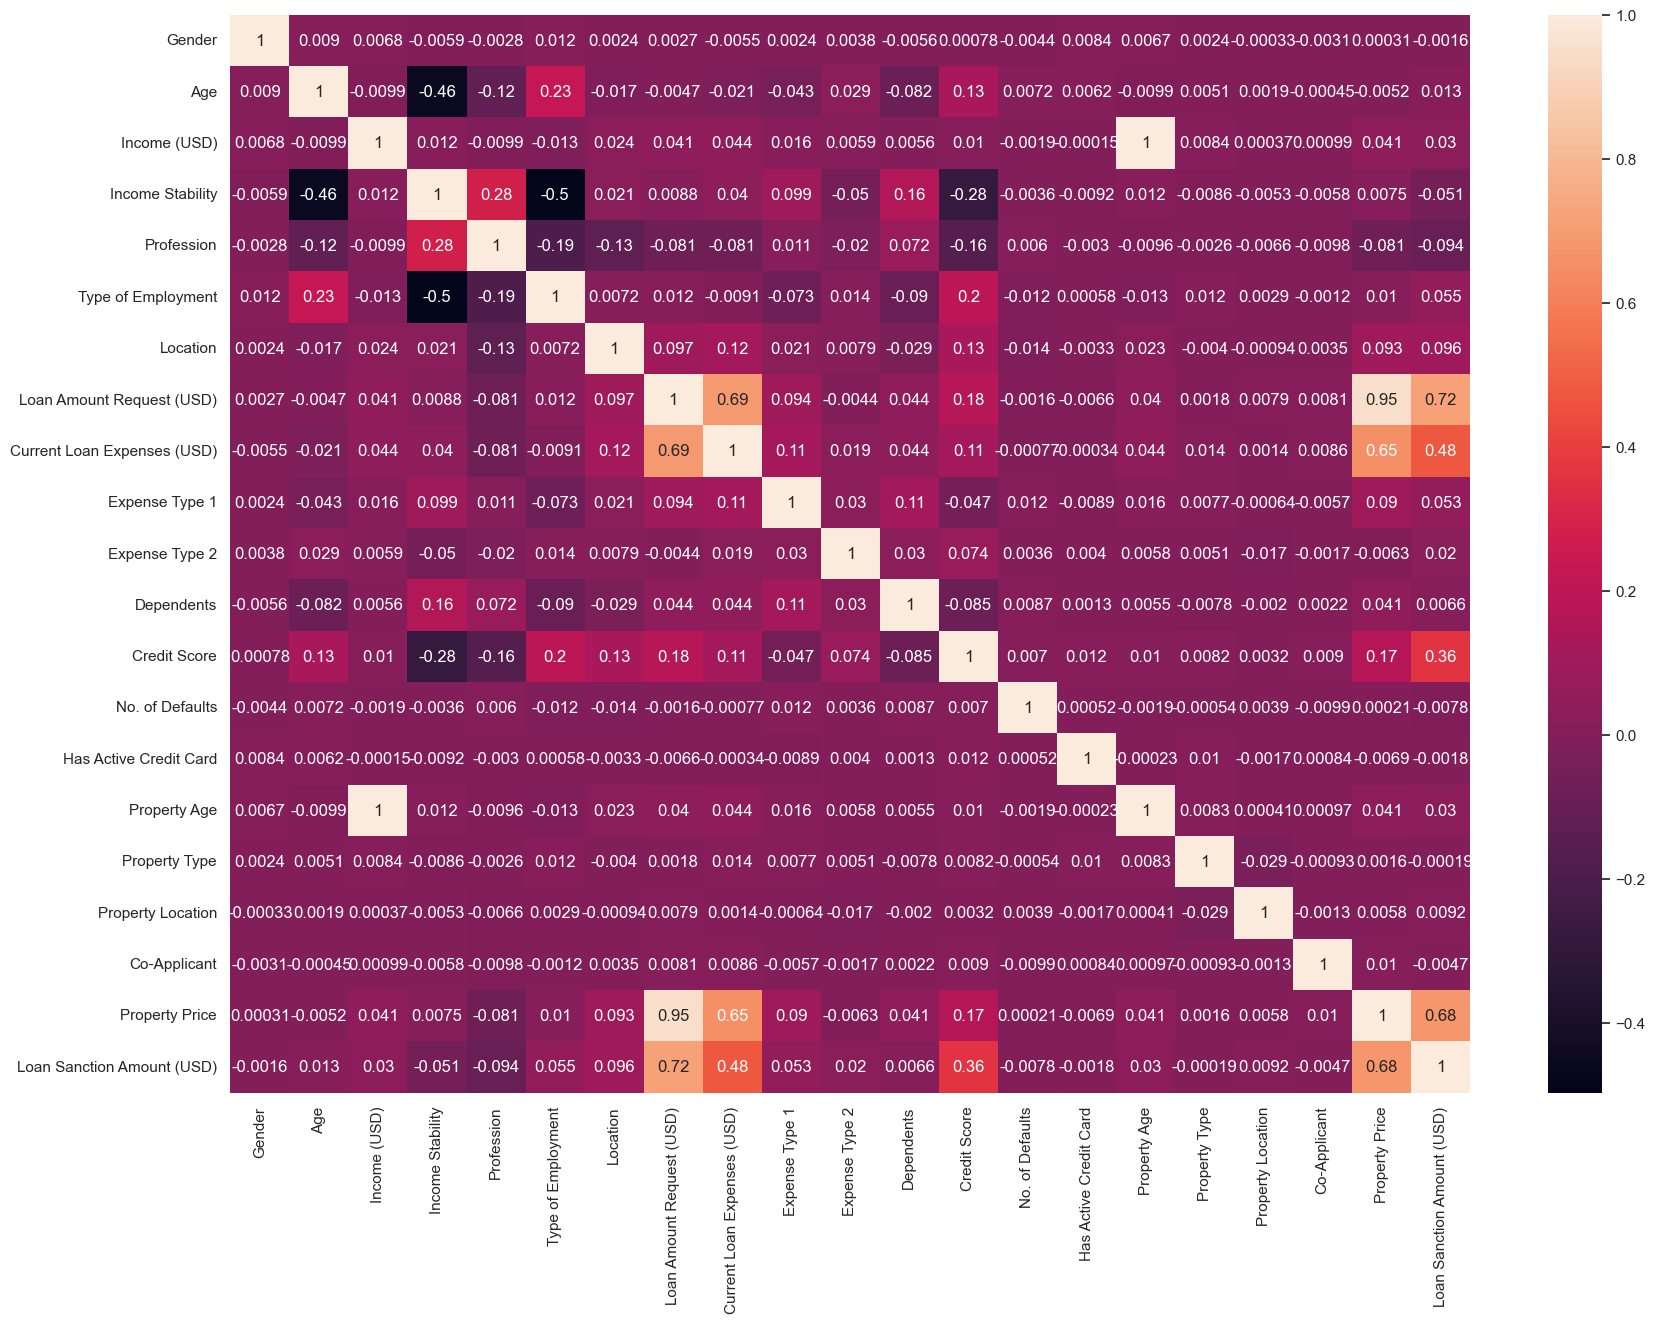

In [18]:
# Correlation Heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(), fmt='.2g', annot=True)
plt.show()

## Train Test Split

In [19]:
X = df.drop('Loan Sanction Amount (USD)', axis=1)
y = df['Loan Sanction Amount (USD)']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

## Remove Outlier from Train Data using Z-Score

In [20]:
# Define the columns for which you want to remove outliers
selected_columns = ['Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
                    'Dependents', 'Property Age', 'Co-Applicant', 'Property Price']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

## Decision Tree Regressor

In [21]:
# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [22]:
dtree = DecisionTreeRegressor(random_state=42, max_depth=6, max_features='auto', min_samples_leaf=4, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=4,
                      random_state=42)

In [23]:
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 12944.093754878302
MAPE is 2.2056891239665844e+19
MSE is 618772762.9017352
R2 score is 0.7306999054117012
RMSE score is 24875.143474997993


## Random Forest Regressor

In [ ]:
# Create a Random Forest Regressor object
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'random_state': [0, 42]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 42}

In [26]:
rf = RandomForestRegressor(random_state=42, max_depth=9, min_samples_split=10, min_samples_leaf=4,
                           max_features='auto')
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [27]:
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 12449.165484216528
MAPE is 2.159683706261809e+19
MSE is 607549587.9927608
R2 score is 0.7355844159231113
RMSE score is 24648.521010250508


# Conclusion

In conclusion, it is determined that the Random Forest Regressor exhibits higher precision among the tested models; therefore, it will be used for prediction.

## Building a Predictive System

In [28]:
X_train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price
4993,0,50,"2,971.01",1,0,4,1,"92,184.78",376.64,0,0,2.00,618.37,0,1,"2,971.01",3,2,1,"123,661.66"
19665,1,31,"3,147.53",1,0,7,0,"23,367.52",266.87,1,1,2.00,634.62,0,0,"3,147.53",1,2,1,"32,157.13"
12790,0,36,"2,485.25",1,4,4,1,"190,992.18",647.99,1,1,2.00,787.62,0,1,"2,485.25",1,0,1,"244,725.78"
8739,1,41,"2,504.14",1,4,4,1,"82,828.47",599.59,0,0,2.00,794.78,0,2,"2,504.14",1,0,1,"98,258.89"
12919,1,24,"2,222.43",1,4,1,1,"34,955.63",261.08,0,0,3.00,615.82,0,0,"2,223.25",3,2,0,"39,272.89"


In [29]:
y_train.head()

4993          0.00
19665         0.00
12790   152,793.74
8739     62,121.35
12919         0.00
Name: Loan Sanction Amount (USD), dtype: float64

In [31]:
def prediction (data):
    input_data_as_numpy_array= np.asarray(data)

    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

    prediction = rf.predict(input_data_reshaped)
    
    print(f'The Loan Sanction is {prediction[0]}')

In [32]:
input_data = (0,50,2971.01,1,0,4,1,92184.78,376.64,0,0,2.00,618.37,0,1,2971.01,3,2,1,123661.66)
prediction(input_data)

The Loan Sanction is 470.14053221336167


In [33]:
input_data = (0,36,2485.25,1,4,4,1,190992.18,647.99,1,1,2.00,787.62,0,1,2485.25,1,0,1,244725.78)
prediction(input_data)

The Loan Sanction is 124938.53768912461


In [34]:
input_data = (1,41,2504.14,1,4,4,1,82828.47,599.59,0,0,2.00,794.78,0,2,2504.14,1,0,1,98258.89)
prediction(input_data)

The Loan Sanction is 54934.490209838805
